1. Знайти субдиференцiал функцiї *f(x)*, проаналiзувати його властивостi як багатозначного вiдображення.

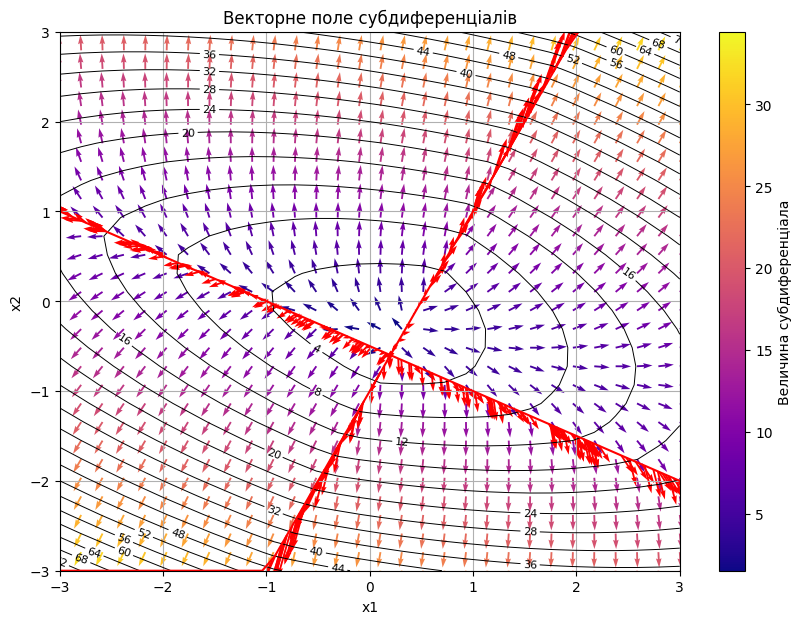

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Визначення функції f
def f(x1, x2):
    return x1**2 + 4 * x2**2 + 2 * x1 * x2 + abs(2 * x1 - x2 - 1) + abs(x1 + 2 * x2 + 1)

# Обчислення частинних похідних для негладких компонентів
def partial_h1_x1(x1, x2):
    term = 2 * x1 - x2 - 1
    if term > 0:
        return [2]
    elif term < 0:
        return [-2]
    else:
        return [-2, 2]

def partial_h1_x2(x1, x2):
    term = 2 * x1 - x2 - 1
    if term > 0:
        return [-1]
    elif term < 0:
        return [1]
    else:
        return [-1, 1]

def partial_h2_x1(x1, x2):
    term = x1 + 2 * x2 + 1
    if term > 0:
        return [1]
    elif term < 0:
        return [-1]
    else:
        return [-1, 1]

def partial_h2_x2(x1, x2):
    term = x1 + 2 * x2 + 1
    if term > 0:
        return [2]
    elif term < 0:
        return [-2]
    else:
        return [-2, 2]

# Обчислення значень субдиференціала
def subdifferential(x1, x2):
    grad_x1_list = [2 * x1 + 2 * x2 + h1_x1 + h2_x1
                    for h1_x1 in partial_h1_x1(x1, x2)
                    for h2_x1 in partial_h2_x1(x1, x2)]

    grad_x2_list = [8 * x2 + 2 * x1 + h1_x2 + h2_x2
                    for h1_x2 in partial_h1_x2(x1, x2)
                    for h2_x2 in partial_h2_x2(x1, x2)]

    return list(zip(grad_x1_list, grad_x2_list))

# Візуалізація субдиференціала
def  visualize_subdifferential_field():
    x_vals = np.linspace(-3, 3, 30)
    y_vals = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x_vals, y_vals)

    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    M = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            subdiff = subdifferential(X[i, j], Y[i, j])
            chosen_grad = random.choice(subdiff)
            magnitude = np.linalg.norm(chosen_grad)
            if magnitude != 0:
                U[i, j] = chosen_grad[0] / magnitude
                V[i, j] = chosen_grad[1] / magnitude
            M[i, j] = magnitude

    Z = np.vectorize(f)(X, Y)

    plt.figure(figsize=(10, 7))
    norm = plt.Normalize(vmin=M.min(), vmax=M.max())
    quiver = plt.quiver(X, Y, U, V, M, cmap='plasma', scale=40, width=0.003, norm=norm)
    contour = plt.contour(X, Y, Z, levels=20, linewidths=0.7, colors='black')
    plt.clabel(contour, inline=True, fontsize=8)
    plt.colorbar(quiver, label='Величина субдиференціала')
    plt.title("Векторне поле субдиференціалів")

    x_vals_clipped = np.linspace(-3, 3, 50)
    y_vals_line1_clipped = np.clip(2 * x_vals_clipped - 1, -3, 3)
    y_vals_line2_clipped = np.clip(-0.5 * x_vals_clipped - 0.5, -3, 3)
    plt.plot(x_vals_clipped, y_vals_line1_clipped, color='red', linestyle='-')
    plt.plot(x_vals_clipped, y_vals_line2_clipped, color='red', linestyle='-')

    num_random_points = 200
    random_points_line1 = [(x, 2 * x - 1) for x in np.random.uniform(-3, 3, num_random_points)]
    random_points_line2 = [(x, -0.5 * x - 0.5) for x in np.random.uniform(-3, 3, num_random_points)]

    for (x1, x2) in random_points_line1 + random_points_line2:
        if -3 <= x2 <= 3:
            subdiff = subdifferential(x1, x2)
            chosen_grad = random.choice(subdiff)
            plt.quiver(x1, x2, chosen_grad[0], chosen_grad[1], angles='xy', scale_units='xy', scale=40, width=0.003, color='red')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()

visualize_subdifferential_field()

2. Побудувати графiк субдиференцiалу функцiї *f(x)* або вiдобразити його характеристики. Розв’язати задачу ***f(x) → min***, застосовуючи один з числових методiв негладкої оптимiзацiї.

In [2]:
import random
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Параметри генетичного алгоритму
population_size = 200
generations = 200
x1_from, x1_to = -6, 6
x2_from, x2_to = -6, 6
mutation_probability = 0.1
early_stop_threshold = 1e-6

In [4]:
# Генерація випадкової популяції
def generate_population():
    return [{"x1": random.uniform(x1_from, x1_to), "x2": random.uniform(x2_from, x2_to)} for _ in range(population_size)]

# Обчислення значення функції
def apply_function(individ):
    x1_val = individ["x1"]
    x2_val = individ["x2"]
    return f(x1_val, x2_val)


# Сортування популяції за значенням цільової функції
def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)

# Схрещування батьків для створення нащадків
def crossover(first_parent, second_parent):
    random_multiplier = random.uniform(0, 1)
    return {
        "x1": first_parent["x1"] * random_multiplier + second_parent["x1"] * (1 - random_multiplier),
        "x2": first_parent["x2"] * random_multiplier + second_parent["x2"] * (1 - random_multiplier)
    }

# Мутація особини
def mutate(individ):
    individ["x1"] += random.uniform(-0.05, 0.05)
    individ["x2"] += random.uniform(-0.05, 0.05)
    individ["x1"] = min(max(individ["x1"], x1_from), x1_to)
    individ["x2"] = min(max(individ["x2"], x2_from), x2_to)
    return individ

# Створення нового покоління
def make_next_generation(previous_population):
    next_generation = []
    for _ in range(population_size):
        parent1 = random.choice(previous_population[:len(previous_population)//2])
        parent2 = random.choice(previous_population[:len(previous_population)//2])
        individ = crossover(parent1, parent2)
        if random.uniform(0, 1) < mutation_probability:
            individ = mutate(individ)
        next_generation.append(individ)
    return next_generation

In [5]:
population = generate_population()
best_results_by_generation = []

for gen in range(generations):
    print(f"=== Покоління {gen + 1} ===")
    sorted_population = sort_population_by_fitness(population)
    best_result = apply_function(sorted_population[0])
    best_results_by_generation.append(best_result)

    print(f"Найкращий результат: x1 = {sorted_population[0]['x1']:.8f}, x2 = {sorted_population[0]['x2']:.8f}, f(x1, x2) = {best_result:.8f}")

    # Умова для ранньої зупинки
    # if gen > 1 and abs(best_results_by_generation[-1] - best_results_by_generation[-2]) < early_stop_threshold:
    #    break

    population = make_next_generation(sorted_population)

best_individ = sort_population_by_fitness(population)[0]

print("\n Оптимальне значення")
print(f"x1 = {best_individ['x1']:.8f}, x2 = {best_individ['x2']:.8f}, f(x1, x2) = {apply_function(best_individ):.8f}")

=== Покоління 1 ===
Найкращий результат: x1 = 0.17920713, x2 = -0.63594698, f(x1, x2) = 1.52022253
=== Покоління 2 ===
Найкращий результат: x1 = 0.16365027, x2 = -0.48555777, f(x1, x2) = 1.19059991
=== Покоління 3 ===
Найкращий результат: x1 = 0.25335176, x2 = -0.36475884, f(x1, x2) = 1.06393029
=== Покоління 4 ===
Найкращий результат: x1 = 0.32601361, x2 = -0.38476525, f(x1, x2) = 1.04086022
=== Покоління 5 ===
Найкращий результат: x1 = 0.29237966, x2 = -0.33472693, f(x1, x2) = 1.04135920
=== Покоління 6 ===
Найкращий результат: x1 = 0.33711516, x2 = -0.31914859, f(x1, x2) = 1.01132933
=== Покоління 7 ===
Найкращий результат: x1 = 0.34638516, x2 = -0.30927113, f(x1, x2) = 1.01820770
=== Покоління 8 ===
Найкращий результат: x1 = 0.31608479, x2 = -0.32569591, f(x1, x2) = 1.02515333
=== Покоління 9 ===
Найкращий результат: x1 = 0.34343247, x2 = -0.32210884, f(x1, x2) = 1.01990558
=== Покоління 10 ===
Найкращий результат: x1 = 0.35044384, x2 = -0.30272487, f(x1, x2) = 1.02581080
=== Покол

In [6]:
# Побудова графіка функції
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.vectorize(f)(X, Y)

best_f = f(best_individ['x1'], best_individ['x2'])

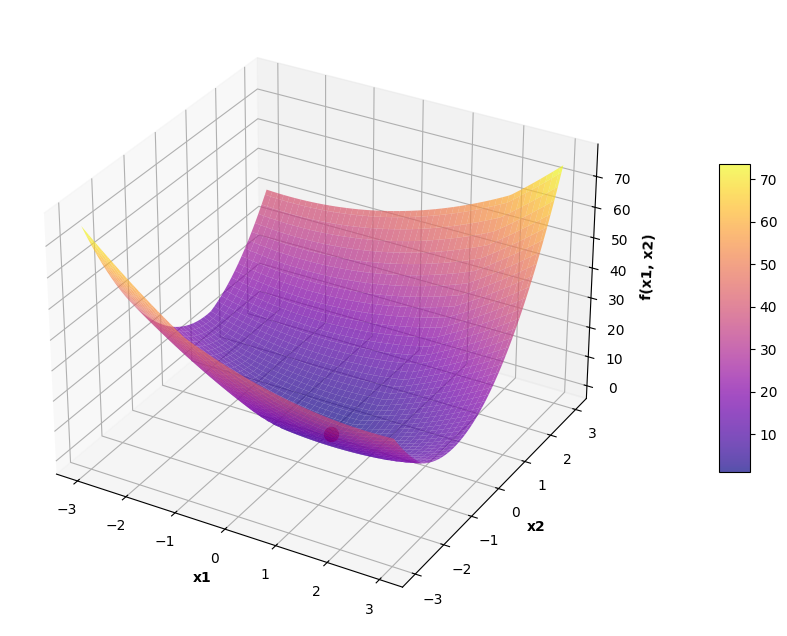

In [7]:
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(projection='3d')
ax1.scatter(best_individ['x1'], best_individ['x2'], best_f, color='r', s=100)
surf1 = ax1.plot_surface(X, Y, Z, cmap="plasma", alpha=0.7)
ax1.set_xlabel("x1", fontweight='bold')
ax1.set_ylabel("x2", fontweight='bold')
ax1.set_zlabel("f(x1, x2)", fontweight='bold')
fig1.colorbar(surf1, shrink=0.5, aspect=10, pad=0.1)
plt.show()

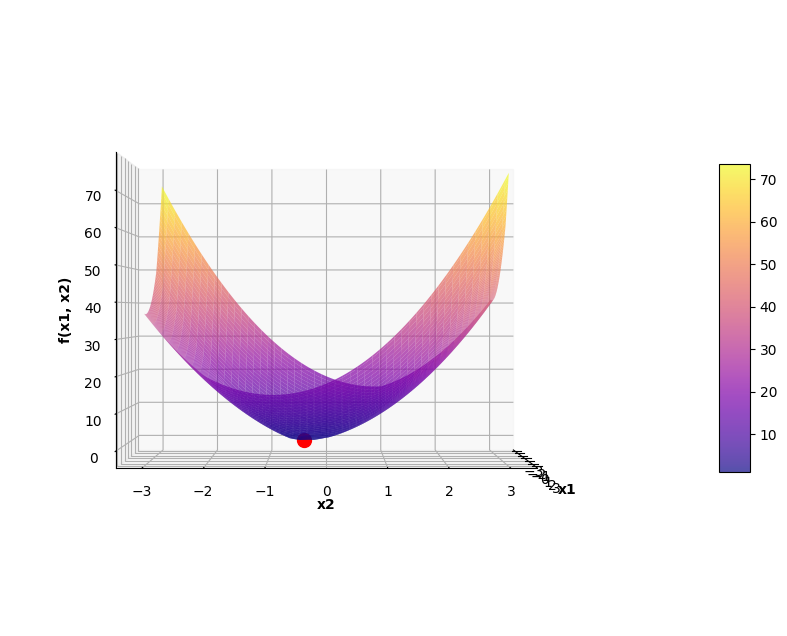

In [8]:
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(best_individ['x1'], best_individ['x2'], best_f, color='r', s=100)
surf2 = ax2.plot_surface(X, Y, Z, cmap="plasma", alpha=0.7)
ax2.set_xlabel("x1", fontweight='bold')
ax2.set_ylabel("x2", fontweight='bold')
ax2.set_zlabel("f(x1, x2)", fontweight='bold')
fig2.colorbar(surf2, shrink=0.5, aspect=10, pad=0.1)
ax2.view_init(elev=0, azim=0)
plt.show()